In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from gptomics import plot

In [3]:
PCs = pd.read_csv(filepath_or_buffer="../principal_components.csv.gz", compression="gzip")
comps = pd.read_csv(filepath_or_buffer="../compositions.csv.gz", compression="gzip")

In [4]:
PCs.columns

Index(['Unnamed: 0', 'src_type', 'src_layer', 'src_index', 'dst_type',
       'dst_layer', 'dst_index', 'term_type', 'term_value'],
      dtype='object')

In [5]:
comps.columns

Index(['Unnamed: 0', 'src_type', 'src_layer', 'src_index', 'dst_type',
       'dst_layer', 'dst_index', 'term_type', 'term_value'],
      dtype='object')

In [6]:
comps

,Unnamed: 0,src_type,src_layer,src_index,dst_type,dst_layer,dst_index,term_type,term_value
0,0,att_head,0,0,mlp_weight,0,0,mlp,0.033481
1,1,att_head,0,1,mlp_weight,0,0,mlp,0.046634
2,2,att_head,0,2,mlp_weight,0,0,mlp,0.046093
3,3,att_head,0,3,mlp_weight,0,0,mlp,0.036301
4,4,att_head,0,4,mlp_weight,0,0,mlp,0.041041
...,...,...,...,...,...,...,...,...,...
41665,41665,att_head,11,8,mlp_weight,11,0,mlp,0.026631
41666,41666,att_head,11,9,mlp_weight,11,0,mlp,0.021453
41667,41667,att_head,11,10,mlp_weight,11,0,mlp,0.027360
41668,41668,att_head,11,11,mlp_weight,11,0,mlp,0.026777


In [7]:
def sort_layer_index(df) : 
  return df.sort_values(by=['src_layer','src_index'])

In [8]:
PC_val = sort_layer_index(PCs)['term_value']
PC_type = sort_layer_index(PCs)['term_type']
comp_val = sort_layer_index(comps)['term_value']
comp_type = sort_layer_index(comps)['term_type']

In [9]:
PC_val

0        0.118228
12       1.000000
13       0.880359
14       0.194478
15       0.325987
           ...   
41664    0.195282
41665    0.072478
41666    0.052943
41667    0.060606
41668    0.059993
Name: term_value, Length: 41670, dtype: float64

In [10]:
comp_val

0        0.033481
12       0.076039
13       0.063658
14       0.041288
15       0.052307
           ...   
41664    0.023865
41665    0.026631
41666    0.021453
41667    0.027360
41668    0.026777
Name: term_value, Length: 41670, dtype: float64

In [11]:
zipped = list(zip(comp_val,PC_val))
zipped

[(0.033481468, 0.1182279234251999),
 (0.07603876, 1.0),
 (0.06365803, 0.8803594638329917),
 (0.04128842, 0.19447754282626),
 (0.052307148, 0.3259874540423896),
 (0.044045918, 0.3075344409969703),
 (0.037864584, 0.1727995015478257),
 (0.036763333, 0.2869978703828223),
 (0.08108897, 0.9110303249959236),
 (0.042032667, 0.131546563673814),
 (0.04116614, 0.3678932602813023),
 (0.0426293, 0.2609147615124546),
 (0.040430654, 0.1527571644375777),
 (0.037213266, 0.3308403238460296),
 (0.061614133, 0.8304302105978737),
 (0.045950513, 0.2475131997805486),
 (0.043446917, 0.3234546585903823),
 (0.040155612, 0.2266329822455784),
 (0.04033382, 0.3117993573823336),
 (0.03901981, 0.4183636322467112),
 (0.1138997, 0.9555687887456396),
 (0.04412474, 0.1227033057430819),
 (0.058650427, 0.7501468564296143),
 (0.040775504, 0.1880398540460918),
 (0.045458913, 0.1295438103622242),
 (0.03244542, 0.2772630597687621),
 (0.02647851, 0.7179040774837651),
 (0.038326122, 0.1592059868128834),
 (0.05324009, 0.31249428

<function matplotlib.pyplot.show(close=None, block=None)>

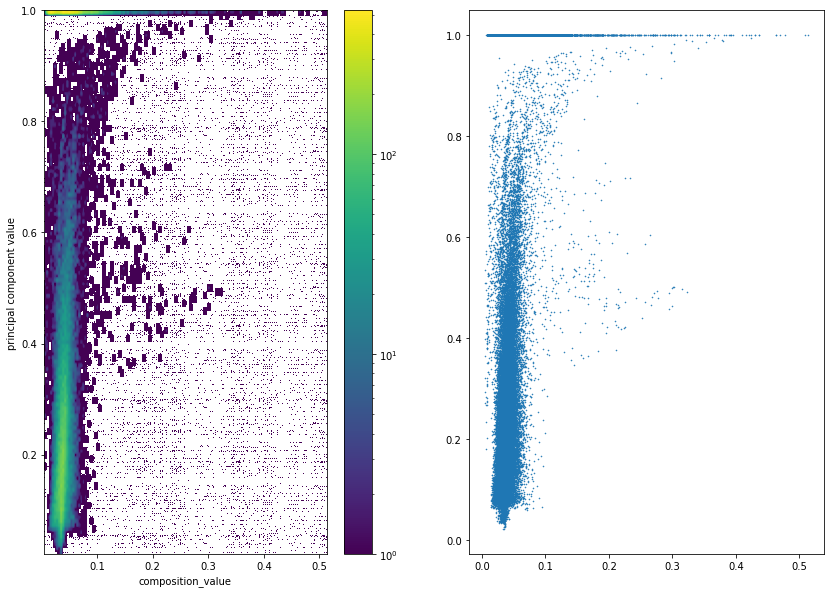

In [70]:
plt.figure(figsize=(14,10))
heatmap, xedges, yedges = np.histogram2d(comp_val, PC_val, bins = 140)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.subplot(1,2,1)
plt.imshow(heatmap.T, extent=extent, origin='lower', norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("composition_value")
plt.ylabel("principal component value")

plt.subplot(1,2,2)
plt.scatter(comp_val,PC_val, s=.3)
plt.show

label points by what kinds of composition they are QKV

In [16]:
# This is a hilariously bad, kernel crashing way to not zip things together. Just use `zip`.
def zip_together(d1, d2) :
  [[x,y] for x in d1 for y in d2]

In [98]:
values = set(PC_type)
PC_pair = list(zip(list(PC_val), list(PC_type)))
PC_grouped = [[vals[0] for vals in PC_pair if vals[1] == type] for type in values]
comp_pair = list(zip(list(comp_val), list(comp_type)))
comp_grouped = [[vals[0] for vals in comp_pair if vals[1] == type] for type in values]

In [99]:
comp_grouped

[[0.033481468,
  0.07603876,
  0.037251923,
  0.061095547,
  0.03800527,
  0.068736486,
  0.039720114,
  0.096309304,
  0.036966626,
  0.07380789,
  0.036377613,
  0.0690578,
  0.045035746,
  0.045035746,
  0.033747908,
  0.050984286,
  0.035477214,
  0.047115076,
  0.043155264,
  0.043155264,
  0.033358112,
  0.04513808,
  0.035747267,
  0.04309334,
  0.042596467,
  0.042596467,
  0.0340339,
  0.04172423,
  0.03545096,
  0.04142072,
  0.03983234,
  0.03983234,
  0.033986453,
  0.048829988,
  0.035699222,
  0.044148095,
  0.045615967,
  0.045615967,
  0.03414435,
  0.04657477,
  0.03557296,
  0.04150561,
  0.04718872,
  0.047188718,
  0.034480087,
  0.04689227,
  0.035678398,
  0.042484757,
  0.05047965,
  0.05047965,
  0.034740698,
  0.040965572,
  0.035710942,
  0.039545417,
  0.051838107,
  0.0518381,
  0.034599017,
  0.035422113,
  0.035648886,
  0.034103498,
  0.056705073,
  0.05670508,
  0.034204785,
  0.027664805,
  0.035419103,
  0.027314264,
  0.082609676,
  0.082609676,
  0.0

In [43]:
#PC_val
values

{'K', 'Q', 'V', 'mlp'}

In [100]:
[len(x) for x in comp_grouped]

[1278, 13464, 13464, 13464]

In [101]:
[len(x) for x in PC_grouped]

[1278, 13464, 13464, 13464]

In [102]:
k_comp = comp_grouped[0]
q_comp = comp_grouped[1]
v_comp = comp_grouped[2]
mlp_comp = comp_grouped[3]
k_pc = PC_grouped[0]
q_pc = PC_grouped[1]
v_pc = PC_grouped[2]
mlp_pc = PC_grouped[3]

<function matplotlib.pyplot.show(close=None, block=None)>

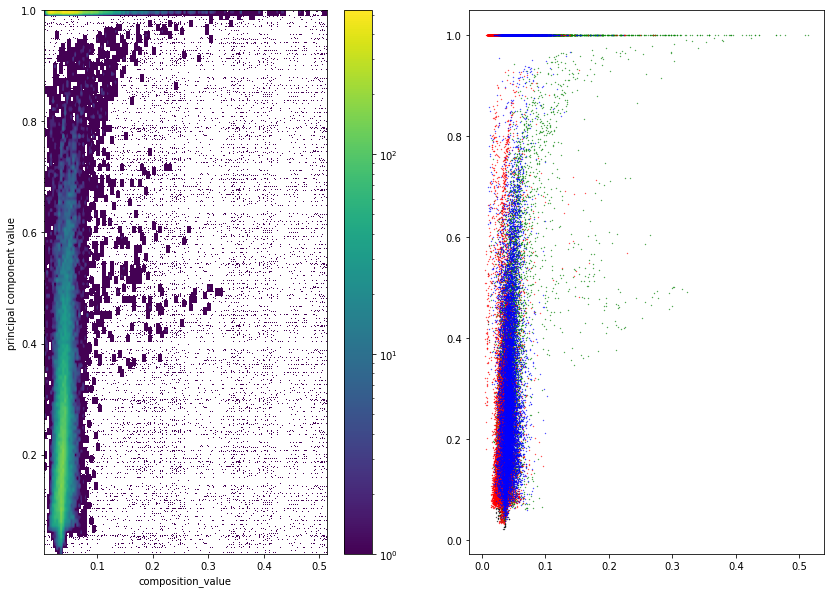

In [110]:
plt.figure(figsize=(14,10))
heatmap, xedges, yedges = np.histogram2d(comp_val, PC_val, bins = 140)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
s=.1
plt.clf()
plt.subplot(1,2,1)
plt.imshow(heatmap.T, extent=extent, origin='lower', norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("composition_value")
plt.ylabel("principal component value")

plt.subplot(1,2,2)
plt.scatter(k_comp,k_pc, s=s, color='k')
plt.scatter(q_comp,q_pc, s=s, color='g')
plt.scatter(v_comp,v_pc, s=s,color='r')
plt.scatter(mlp_comp,mlp_pc,s=s,color='b')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

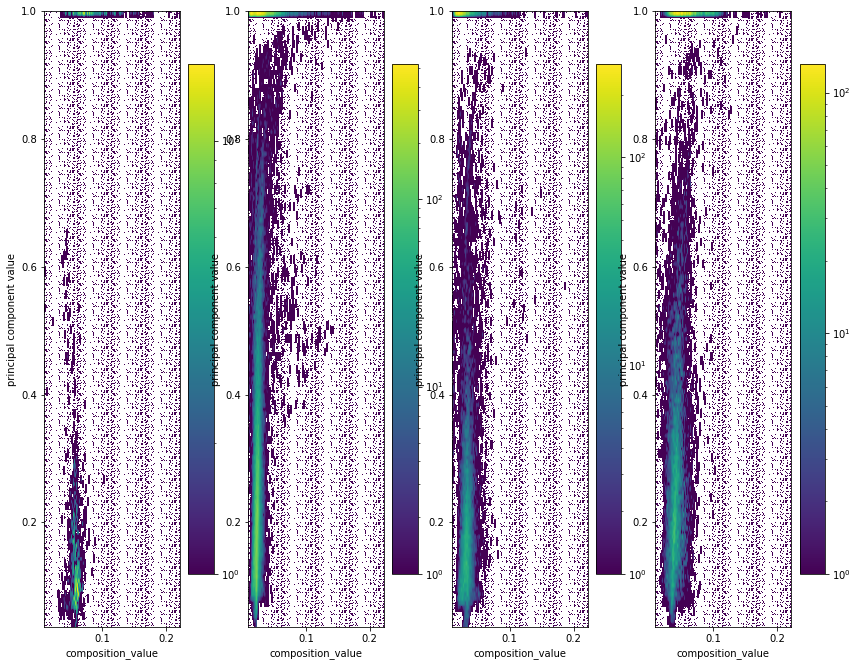

In [115]:
plt.figure(figsize=(14,20))
k_heatmap, xedges, yedges = np.histogram2d(k_comp, k_pc, bins = 140)
q_heatmap, xedges, yedges = np.histogram2d(q_comp, q_pc, bins = 140)
v_heatmap, xedges, yedges = np.histogram2d(v_comp, v_pc, bins = 140)
mlp_heatmap, xedges, yedges = np.histogram2d(mlp_comp, mlp_pc, bins = 140)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
s=.1
plt.clf()
plt.subplot(1,4,1)
plt.imshow(k_heatmap.T, extent=extent, origin='lower', norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("composition_value")
plt.ylabel("principal component value")

plt.subplot(1,4,2)
plt.imshow(heatmap.T, extent=extent, origin='lower', norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("composition_value")
plt.ylabel("principal component value")

plt.subplot(1,4,3)
plt.imshow(v_heatmap.T, extent=extent, origin='lower', norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("composition_value")
plt.ylabel("principal component value")

plt.subplot(1,4,4)
plt.imshow(mlp_heatmap.T, extent=extent, origin='lower', norm=colors.LogNorm())
plt.colorbar()
plt.xlabel("composition_value")
plt.ylabel("principal component value")



plt.show